## Importing the necessary packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model

In [ ]:
!wget https://www.incimages.com/uploaded_files/image/970x450/getty_856794670_385651.jpg
!wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/colorful-of-dahlia-pink-flower-in-beautiful-garden-royalty-free-image-825886130-1554743243.jpg
!wget https://images.unsplash.com/photo-1559626291-042ad65d8b5c?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=750&q=80

--2021-06-21 09:27:46--  https://www.incimages.com/uploaded_files/image/970x450/getty_856794670_385651.jpg
Resolving www.incimages.com (www.incimages.com)... 151.101.2.59, 151.101.66.59, 151.101.130.59, ...
Connecting to www.incimages.com (www.incimages.com)|151.101.2.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133193 (130K) [image/jpeg]
Saving to: ‘getty_856794670_385651.jpg’

getty_856794670_385 100%[===================>] 130.07K  --.-KB/s    in 0.02s   

2021-06-21 09:27:47 (7.43 MB/s) - ‘getty_856794670_385651.jpg’ saved [133193/133193]

--2021-06-21 09:27:47--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/colorful-of-dahlia-pink-flower-in-beautiful-garden-royalty-free-image-825886130-1554743243.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 20

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D


noob_model = Sequential()

noob_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)))
noob_model.add(Conv2D(64, (3, 3), activation='relu'))
noob_model.add(MaxPooling2D())
# noob_model.add(Conv2D(128, (3, 3), activation='relu'))
# noob_model.add(Conv2D(128, (3, 3), activation='relu'))
# noob_model.add(MaxPooling2D())
# noob_model.add(Conv2D(256, (3, 3), activation='relu'))
# noob_model.add(Conv2D(256, (3, 3), activation='relu'))
# noob_model.add(MaxPooling2D())
noob_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [ ]:
base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
for layer in model.layers:
   layer.trainable = False
model.summary()

574726144/574710816 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
def split_img(img):
    ls = []
    for i in range(0,img.shape[0],100):
        for j in range(0,img.shape[1],100):
            x = img[i:i+100,j:j+100]
            ls.append(x)
    return ls

def show_splitted(ls):
  i = 0
  fig, ax = plt.subplots(nrows=5, ncols=5)
  for row in ax:
      for col in row:
        col.imshow(ls[i])
        col.set_title(str(i))
        col.axis('off')
        i+=1
        
def just_show(img):
  plt.imshow(img)
  plt.show()
  
def calc_variation(img1,img2):
  print(np.sum(img1-img2))

In [ ]:
def predict(img,s_tiles):
  prediction = []
  for k,s_tile in enumerate(s_tiles):
    out1 = model.predict(np.expand_dims(cv2.resize(s_tile,dsize=(224,224)),axis=0))
    sup_ls = []
    for tile in split_img(img): 
      out2 = model.predict(np.expand_dims(cv2.resize(tile,dsize=(224,224)),axis=0))
      ls = []
      for i in range(out1.shape[-1]):
        ls.append(np.mean((out1[0][:,:,i] - out2[0][:,:,i])**2))
      sup_ls.append(np.mean(np.array(ls)))
    print(k,'-->',np.argmin(np.array(sup_ls)))
    prediction.append(np.argmin(np.array(sup_ls)))
  return prediction

def noob_predict(img,s_tiles):
  prediction = []
  for k,s_tile in enumerate(s_tiles):
    out1 = noob_model.predict(np.expand_dims(cv2.resize(s_tile,dsize=(224,224)),axis=0))
    sup_ls = []
    for tile in split_img(img): 
      out2 = noob_model.predict(np.expand_dims(cv2.resize(tile,dsize=(224,224)),axis=0))
      ls = []
      for i in range(out1.shape[-1]):
        ls.append(np.mean((out1[0][:,:,i] - out2[0][:,:,i])**2))
      sup_ls.append(np.mean(np.array(ls)))
    print(k,'-->',np.argmin(np.array(sup_ls)))
    prediction.append(np.argmin(np.array(sup_ls)))
  return prediction

In [ ]:
def crop_n_resize(img,crop_val=5):
  cropped = img[crop_val:-crop_val,crop_val:-crop_val,:]+5
  return cv2.resize(cropped,dsize=(img.shape[1],img.shape[0]))

original_image


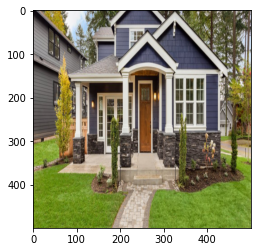

Adding variaton to the original image


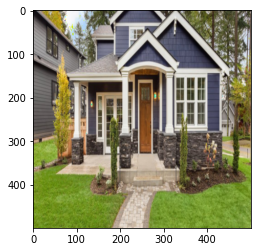

In [ ]:
print('original_image')
# original_image = cv2.resize(plt.imread('photo-1559626291-042ad65d8b5c?ixlib=rb-1.2.1'),(500,500))
# original_image = cv2.resize(plt.imread('colorful-of-dahlia-pink-flower-in-beautiful-garden-royalty-free-image-825886130-1554743243.jpg'),(500,500))
original_image = cv2.resize(plt.imread('getty_856794670_385651.jpg'),(500,500))
just_show(original_image)

print('Adding variaton to the original image')
new_image = crop_n_resize(original_image)
just_show(new_image)

In [ ]:
print('checking variation of original and the new image')
calc_variation(original_image,new_image)
calc_variation(original_image,original_image)

checking variation of original and the new image
119348163
0


splitting the new image...


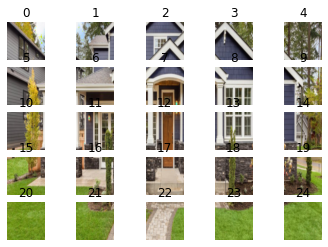

shuffling the new image...


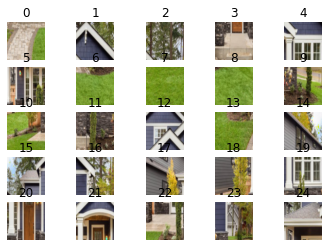

In [ ]:
print('splitting the new image...')
image_tiles = split_img(new_image)
show_splitted(image_tiles)
plt.show()

print('shuffling the new image...')
random.shuffle(image_tiles)
show_splitted(image_tiles)
plt.show()

In [ ]:
prediction = predict(original_image,image_tiles)

0 --> 22
1 --> 3
2 --> 4
3 --> 17
4 --> 8
5 --> 11
6 --> 23
7 --> 20
8 --> 24
9 --> 19
10 --> 15
11 --> 18
12 --> 2
13 --> 21
14 --> 0
15 --> 1
16 --> 9
17 --> 5
18 --> 10
19 --> 13
20 --> 12
21 --> 7
22 --> 16
23 --> 14
24 --> 6


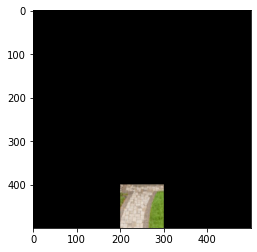

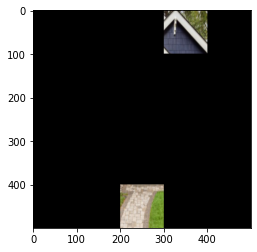

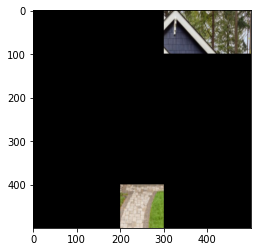

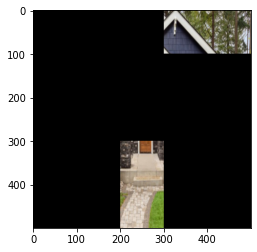

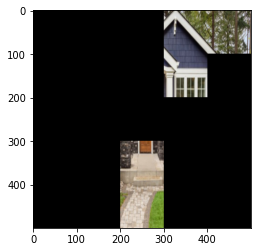

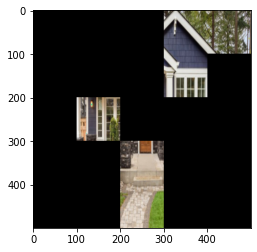

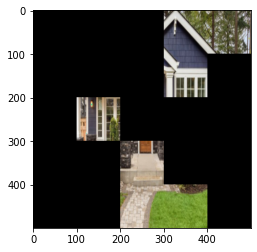

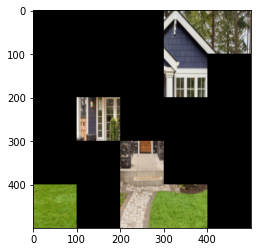

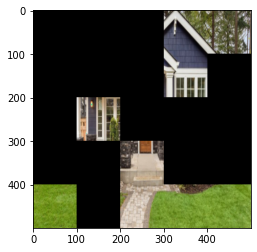

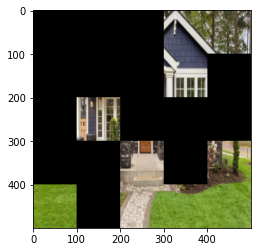

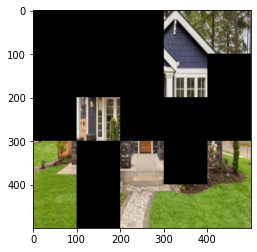

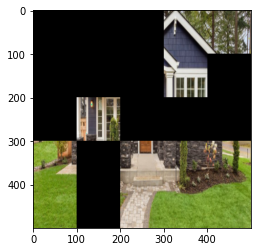

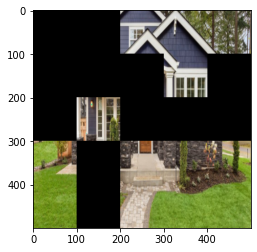

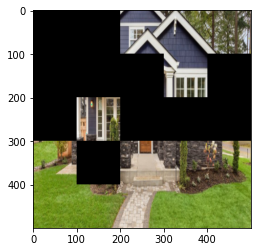

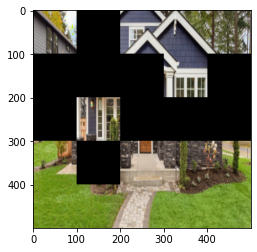

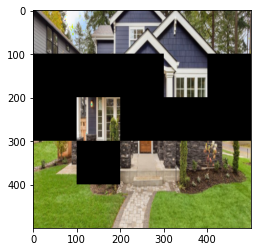

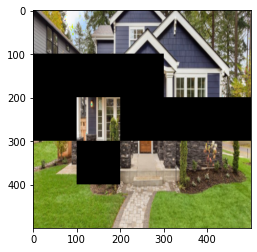

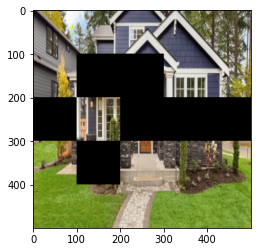

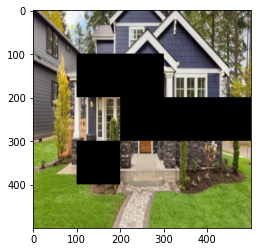

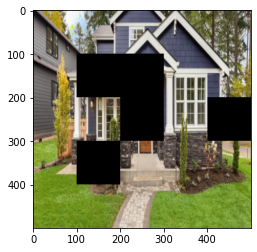

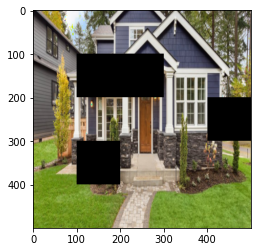

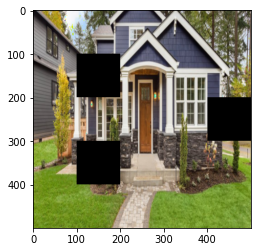

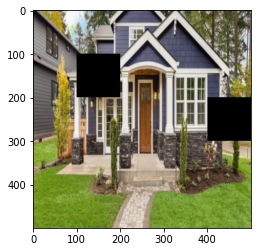

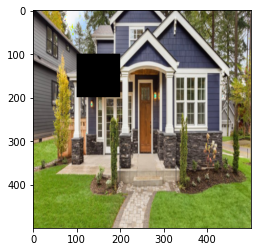

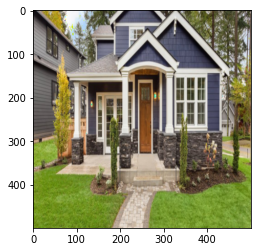

In [ ]:
def merge(image_tiles,prediction):
  result = np.zeros((500,500,3), dtype='uint8')
  for l,k in enumerate(prediction): 
    i,j = (k//5)*100,(k%5)*100
    result[i:i+100,j:j+100] = image_tiles[l]
    plt.imshow(result)
    plt.show()

merge(image_tiles,prediction)